In [4]:
import pandas as pd
import numpy as np
import os
import sys
from datetime import datetime
from matplotlib import pyplot as plt

repo_dir = '../repo'
tft_dir = os.path.join(repo_dir, 'tft')
# os.chdir(tft_dir)

import warnings  
warnings.filterwarnings('ignore')
%matplotlib inline
sys.path.append('/workspace/inkyung/Fall_Detection_using_multihorizon_forecasting/')

In [2]:
!ls

MobiAct_Dataset_v2.0	  __MACOSX	       outputs_mobiact_wo_age
MobiAct_Dataset_v2.0.rar  data_formatters      outputs_mobiact_wo_height
NotchDataset		  expt_settings        outputs_mobiact_wo_weight
Notch_Dataset.zip	  libs		       outputs_smartFall
SmartFall_Dataset	  outputs_mobiact      outputs_smartFall_wo_known
SmartFall_Dataset.zip	  outputs_mobiact(v2)


## 데이터 예시

In [6]:
sample1 = pd.read_csv(path + '32ms_User1_LeftWrist.csv')
print(sample1.columns)
sample1.head()

Index(['Acc_x [m/s^2]', 'Acc_y [m/s^2]', 'Acc_z [m/s^2]', 'AnyFall',
       'NegOutcome'],
      dtype='object')


,Acc_x [m/s^2],Acc_y [m/s^2],Acc_z [m/s^2],AnyFall,NegOutcome
0,0.014282,-0.172332,-0.482754,0,1
1,0.016369,-0.174700,-0.417005,0,1
2,0.088920,0.157522,-0.213992,0,1
3,0.106267,0.282953,-0.159411,0,1
4,-0.005552,0.206771,-0.042602,0,1


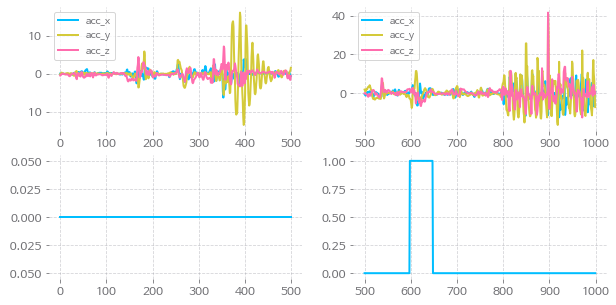

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(sample1['Acc_x [m/s^2]'][:500], label='acc_x')
plt.plot(sample1['Acc_y [m/s^2]'][:500], label='acc_y')
plt.plot(sample1['Acc_z [m/s^2]'][:500], label='acc_z')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(sample1['Acc_x [m/s^2]'][500:1000], label='acc_x')
plt.plot(sample1['Acc_y [m/s^2]'][500:1000], label='acc_y')
plt.plot(sample1['Acc_z [m/s^2]'][500:1000], label='acc_z')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(sample1['AnyFall'][:500], label='outcome')

plt.subplot(2, 2, 4)
plt.plot(sample1['AnyFall'][500:1000], label='outcome')
plt.show()

# Data processing

In [2]:
path = '../dataset/notch_dataset/'
file_list = os.listdir(path)
file_list = sorted(file_list)
print(file_list)
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for idx, file in enumerate(file_list):
    if file.endswith('.csv'):
        data = pd.read_csv(path + file)
        data['person_num'] = idx + 1
        data['circum'] = 0
        data['signal point index'] = list(range(len(data)))
        data['time'] = list(range(len(data)))
        data['AnyFall'] = data['AnyFall'].astype(float)
        if idx in [0, 1, 2, 3, 4]:
            train = pd.concat([train, data])
        if idx == 5:
            valid = pd.concat([valid, data])
        if idx == 6:
            test = pd.concat([test, data])

['32ms_User1_LeftWrist.csv', '32ms_User2_LeftWrist.csv', '32ms_User3_LeftWrist.csv', '32ms_User4_LeftWrist.csv', '32ms_User5_LeftWrist.csv', '32ms_User6_LeftWrist.csv', '32ms_User7_LeftWrist.csv']
['32ms_User1_LeftWrist.csv', '32ms_User2_LeftWrist.csv', '32ms_User3_LeftWrist.csv', '32ms_User4_LeftWrist.csv', '32ms_User5_LeftWrist.csv', '32ms_User6_LeftWrist.csv', '32ms_User7_LeftWrist.csv']
['32ms_User1_LeftWrist.csv', '32ms_User2_LeftWrist.csv', '32ms_User3_LeftWrist.csv', '32ms_User4_LeftWrist.csv', '32ms_User5_LeftWrist.csv', '32ms_User6_LeftWrist.csv', '32ms_User7_LeftWrist.csv']


In [12]:
valid.head()

,Acc_x [m/s^2],Acc_y [m/s^2],Acc_z [m/s^2],AnyFall,NegOutcome,person_num,circum,signal point index,time
0,-0.092736,-0.028293,0.115090,0.0,1,6,0,0,0
1,-0.079367,-0.014412,0.031983,0.0,1,6,0,1,1
2,-0.102684,-0.017797,-0.029947,0.0,1,6,0,2,2
3,-0.116248,-0.023411,-0.036827,0.0,1,6,0,3,3
4,-0.141860,0.006247,-0.012190,0.0,1,6,0,4,4


In [13]:
test.columns

Index(['Acc_x [m/s^2]', 'Acc_y [m/s^2]', 'Acc_z [m/s^2]', 'AnyFall',
       'NegOutcome', 'person_num', 'circum', 'signal point index', 'time'],
      dtype='object')

In [14]:
output_folder = os.path.join(os.getcwd(), 'outputs_notchFall')   # Root folder to save experiment outputs
force_download = False 
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [5]:
from data_formatters.base import GenericDataFormatter, DataTypes, InputTypes

# View avialable inputs and data types.
print("Available data types:")
for option in DataTypes:
    print(option)

print()
print("Avaialbe input types:")
for option in InputTypes:
    print(option)

Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME
Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME
Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME


In [6]:
from libs import utils 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
class smartFallFormatter(GenericDataFormatter):
    _column_definition = [
        ('person_num', DataTypes.REAL_VALUED, InputTypes.ID),
        ('circum', DataTypes.REAL_VALUED, InputTypes.STATIC_INPUT),
        ('time', DataTypes.REAL_VALUED, InputTypes.TIME),
        ('signal point index', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
        ('Acc_x [m/s^2]', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('Acc_y [m/s^2]', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('Acc_z [m/s^2]', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('AnyFall', DataTypes.REAL_VALUED, InputTypes.TARGET)
    ]
    
    def __init__(self):
        """initializes formatter"""
        
        self.identifiers = None
        self._real_scalers = None
        self._cat_scalers = None
        self._target_scaler = None
        self._num_classes_per_cat_input = None
    
    def split_data(self, train, valid, test):
        """
        split data frame into training-validation-test data frames
        
        """
        print('Formatting train-valid-test splits.')
        
        train_data = train
        val_data = valid

        test_data = test
        
        self.set_scalers(train_data)
        
        return (self.transform_inputs(data) for data in [train_data, val_data, test_data])
    
    def set_scalers(self, df):
        """
        Calibrates scalers using the data supplied.
        (제공된 데이터를 사용해서 scaler 교정)

        Args:
          df: Data to use to calibrate scalers.
        """
        print('Setting scalers with training data...')
        
        column_definitions = self.get_column_definition()

        id_column = utils.get_single_col_by_input_type(InputTypes.ID,
                                                       column_definitions)
        target_column = utils.get_single_col_by_input_type(InputTypes.TARGET,
                                                           column_definitions)
        # extract identifiers in case required
        self.identifiers = list(df[id_column].unique())
        
        # Format real scalers
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        data = df[real_inputs].values
        self._real_scalers = sklearn.preprocessing.StandardScaler().fit(data)
        
        # target데이터를 prediction에 사용
        self._target_scaler = sklearn.preprocessing.StandardScaler().fit(df[[target_column]].values)
        
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        categorical_scalers = {}
        num_classes = []
        for col in categorical_inputs:
            srs = df[col].apply(str)
            categorical_scalers[col] = sklearn.preprocessing.LabelEncoder().fit(srs.values)
            num_classes.append(srs.nunique())
        
        # set categorical scaler outputs
        self._cat_scalers = categorical_scalers
        self._num_classes_per_cat_input = num_classes
        
    def transform_inputs(self, df):
        """
        performs feature transformations.
        
        feature engineering, preprocessing and normalization을 포함
        
        Args:
            df - data frame to transform.
            
        Returns:
            Transformed data frame.
        """
        output = df.copy()
        
        if self._real_scalers is None and self._cat_scalers is None:
            raise ValueError('Scalers have not been set!')
        
        column_definitions = self.get_column_definition()
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME}
        )
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        output[real_inputs] = self._real_scalers.transform(df[real_inputs].values)
        for col in categorical_inputs:
            string_df = df[col].apply(str)
            output[col] = self._cat_scalers[col].transform(string_df)
        return output
    
    def format_predictions(self, predictions):
        output = predictions.copy()
        
        column_names = predictions.columns
        for col in column_names:
            if col not in {'forecast_time', 'identifier'}:
                output[col] = self._target_scaler.inverse_transform(predictions[col])
                
        return output
    
    def get_fixed_params(self):
        fixed_params = {
            'total_time_steps': 64,     # Total width of the Temporal Fusion Decoder
            'num_encoder_steps': 32,    # Length of LSTM decoder (ie. # historical inputs)
            'num_epochs': 100,            # Max number of epochs for training
            'early_stopping_patience': 5, # Early stopping threshold for # iterations with no loss improvement
            'multiprocessing_workers': 5  # Number of multi-processing workers
        }
        
        return fixed_params
    
    def get_default_model_params(self):
        model_params = {
            'dropout_rate': 0.3,
            'hidden_layer_size': 160,
            'learning_rate': 0.01,
            'minibatch_size': 64,
            'max_gradient_norm': 0.01,
            'num_heads': 4,
            'stack_size': 1
        }

        return model_params

2022-04-03 06:23:32.626612: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-03 06:23:32.626612: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-03 06:23:32.626612: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [7]:
data_formatter = smartFallFormatter()
train, valid, test = data_formatter.split_data(train, valid, test)
train_samples, valid_samples = data_formatter.get_num_samples_for_calibration(
  )

Formatting train-valid-test splits.
Setting scalers with training data...
Formatting train-valid-test splits.
Setting scalers with training data...
Formatting train-valid-test splits.
Setting scalers with training data...


In [18]:
valid.head()

,Acc_x [m/s^2],Acc_y [m/s^2],Acc_z [m/s^2],AnyFall,NegOutcome,person_num,circum,signal point index,time
0,-0.063924,-0.013083,0.058243,-0.28978,1,6,0.0,-1.595403,0
1,-0.054394,-0.008443,0.008864,-0.28978,1,6,0.0,-1.595149,1
2,-0.071014,-0.009575,-0.027933,-0.28978,1,6,0.0,-1.594895,2
3,-0.080683,-0.011451,-0.032020,-0.28978,1,6,0.0,-1.594641,3
4,-0.098938,-0.001538,-0.017382,-0.28978,1,6,0.0,-1.594387,4


In [8]:
import libs.hyperparam_opt
import libs.tft_model
import libs.utils as util

ModelClass = libs.tft_model.TemporalFusionTransformer
data_params = data_formatter.get_experiment_params()
param_ranges = ModelClass.get_hyperparm_choices()

In [9]:
model_params = {'dropout_rate': 0.3,      # Dropout discard rate
                'hidden_layer_size': 320, # Internal state size of TFT
                'learning_rate': 0.001,   # ADAM initial learning rate
                'minibatch_size': 256,    # Minibatch size for training
                'max_gradient_norm': 100.,# Max norm for gradient clipping
                'num_heads': 4,           # Number of heads for multi-head attention
                'stack_size': 1           # Number of stacks (default 1 for interpretability)
               }

In [10]:
model_folder = os.path.join(output_folder, 'saved_models', 'notchFall', 'fixed')
model_params['model_folder'] = model_folder

model_params.update(data_params)

NameError: name 'output_folder' is not defined

NameError: name 'output_folder' is not defined

NameError: name 'output_folder' is not defined

In [22]:
HyperparamOptManager = libs.hyperparam_opt.HyperparamOptManager
print("*** Loading hyperparm manager ***")
opt_manager = HyperparamOptManager(param_ranges, data_params, model_folder)

*** Loading hyperparm manager ***


In [23]:
success = opt_manager.load_results()
restart_opt = 'yes'
if success and not restart_opt:
    print("Loaded results from previous training")
else:
    print("Creating new hyperparameter optimisation")
    opt_manager.clear()

Loading results from /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_notchFall/saved_models/notchFall/fixed
Creating new hyperparameter optimisation


In [24]:
import tensorflow as tf
from libs.tft_model import TemporalFusionTransformer

# Specify GPU usage
tf_config = utils.get_default_tensorflow_config(tf_device="gpu", gpu_id=3)

Selecting GPU ID=3


## Training

In [25]:
tf.compat.v1.get_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:

    tf.compat.v1.keras.backend.set_session(sess)
    params = opt_manager.get_next_parameters()
    # Create a TFT model
    model = TemporalFusionTransformer(model_params,
                                    use_cudnn=True) # Run model on GPU using CuDNNLSTM cells

    # Sample data into minibatches for training
    if not model.training_data_cached():
        model.cache_batched_data(train, "train", num_samples=train_samples)
        model.cache_batched_data(valid, "valid", num_samples=valid_samples)

    # Train and save model
    model.fit()
    
    val_loss = model.evaluate()
    if np.allclose(val_loss, 0.) or np.isnan(val_loss):
        # Set all invalid losses to infintiy.
        # N.b. val_loss only becomes 0. when the weights are nan.
        print("Skipping bad configuration....")
        val_loss = np.inf
    opt_manager.update_score(params, val_loss, model)
    tf.compat.v1.keras.backend.set_session(sess)
    model.save(model_folder)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:63:00.0, compute capability: 7.5

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_notchFall/saved_models/notchFall/fixed
# total_time_steps = 64
# num_encoder_steps = 32
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('person_num', <DataTypes.REAL_VALUED: 0>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('circum', <DataTypes.REAL_VALUED: 0>, <InputTypes.STATIC_INPUT: 3>), ('signal point index', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('Acc_x [m/s^2]', <DataTypes.REAL_VALUED: 0>, <InputTypes.OBSERVED_INPUT: 1>), ('Acc_y [m/s^2]', <Da

Cached data "train" updated
Cached data "valid" updated
*** Fitting TemporalFusionTransformer ***
Getting batched_data
Using cached training data
Using cached validation data
Using keras standard fit
Train on 47923 samples, validate on 12168 samples
Epoch 1/100
47923/47923 [==============================] - 66s 1ms/sample - loss: 0.4853 - val_loss: 0.2620
Epoch 2/100
47923/47923 [==============================] - 51s 1ms/sample - loss: 0.2242 - val_loss: 0.2254
Epoch 3/100
47923/47923 [==============================] - 49s 1ms/sample - loss: 0.1925 - val_loss: 0.2171
Epoch 4/100
47923/47923 [==============================] - 48s 1ms/sample - loss: 0.1850 - val_loss: 0.1981
Epoch 5/100
47923/47923 [==============================] - 56s 1ms/sample - loss: 0.1814 - val_loss: 0.1851
Epoch 6/100
47923/47923 [==============================] - 50s 1ms/sample - loss: 0.1751 - val_loss: 0.1867
Epoch 7/100
47923/47923 [==============================] - 53s 1ms/sample - loss: 0.1696 - val_loss: 0

## Evaluation

In [26]:
tf.compat.v1.reset_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    # Create a new model & load weights
    model = TemporalFusionTransformer(model_params,
                                      use_cudnn=True)
    model.load(model_folder)
    
    # Make forecasts
    output_map = model.predict(test, return_targets=True)
    
    targets = data_formatter.format_predictions(output_map["targets"])
    # Format predictions
    
    p50_forecast = data_formatter.format_predictions(output_map["p50"])
    p90_forecast = data_formatter.format_predictions(output_map["p90"])

    def extract_numerical_data(data):
        """Strips out forecast time and identifier columns."""
        return data[[
            col for col in data.columns
            if col not in {"forecast_time", "identifier"}
        ]]
    # Compute Losses
    p50_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p50_forecast),
        0.5)
    p90_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p90_forecast),
        0.9)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:63:00.0, compute capability: 7.5

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_notchFall/saved_models/notchFall/fixed
# total_time_steps = 64
# num_encoder_steps = 32
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('person_num', <DataTypes.REAL_VALUED: 0>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('circum', <DataTypes.REAL_VALUED: 0>, <InputTypes.STATIC_INPUT: 3>), ('signal point index', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('Acc_x [m/s^2]', <DataTypes.REAL_VALUED: 0>, <InputTypes.OBSERVED_INPUT: 1>), ('Acc_y [m/s^2]', <Da

Loading model from /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_notchFall/saved_models/notchFall/fixed/TemporalFusionTransformer.ckpt
tensor: TemporalFusionTransformer/dense/bias (float32) [320]
[-6.99142413e-03 -7.69717619e-03 -5.22138132e-03  8.26388877e-03
 -3.17161391e-03  4.88083577e-03 -6.97691739e-03 -6.54059043e-03
 -5.95681462e-03 -8.99944641e-03 -9.10302717e-03  9.32204723e-03
  4.06703446e-03 -5.69078559e-03 -6.72194920e-03 -6.40592817e-03
  6.46031508e-03  1.04107661e-03  8.41470808e-03  7.83050433e-03
  8.02606717e-03 -2.28274195e-03 -2.93939817e-03  1.87016116e-03
  4.51496895e-03  3.39188310e-03  9.70359240e-03  7.88747706e-03
  6.74805744e-03  3.05010960e-03  8.81564058e-03  6.68003084e-03
  3.88352410e-03 -2.51952497e-05  6.39396813e-03 -1.22922994e-02
 -9.53436363e-03  1.31207390e-03 -8.11585970e-03  1.03191221e-02
 -8.13256018e-03 -8.15127138e-03 -6.04552589e-03  1.29228560e-02
 -9.28919483e-03 -7.17667304e-03 -1.56508270e-03  1.03877168e-02
  8.29178188e-03 -6.808315

 -0.00660096  0.00618853]
tensor: TemporalFusionTransformer/dense_23/kernel (float32) [320, 320]
[[ 0.04522875  0.01597047  0.0361849  ... -0.07754105  0.03566594
   0.01060716]
 [ 0.07505655 -0.04466383 -0.07174522 ...  0.07317971 -0.06000385
   0.06664407]
 [-0.01665593  0.02845117  0.00395119 ... -0.04146399  0.05397628
   0.02525556]
 ...
 [-0.04071894 -0.05000827  0.00248985 ... -0.05829363 -0.06716917
  -0.08988146]
 [-0.08025657 -0.04507303 -0.0404317  ...  0.04339992 -0.05656211
   0.09394678]
 [-0.07311717  0.0632044   0.12421363 ...  0.06003144  0.02753749
  -0.08448685]]
tensor: TemporalFusionTransformer/dense_24/bias (float32) [320]
[ 9.97256860e-03  5.98244183e-03 -4.87896241e-03  5.87623240e-03
 -6.69906475e-03 -6.71812240e-03  2.47426843e-03 -4.36017010e-03
  7.65640149e-03 -5.47182932e-03 -3.87482927e-03  5.47790807e-03
  6.90262299e-03 -5.46903023e-03 -7.18436250e-03  3.91689222e-03
  5.74829010e-03  8.24921392e-03 -5.74254105e-03 -6.58740010e-03
  4.10295697e-03 -5.58

[[ 0.01268467 -0.01085882  0.03746953 ... -0.07878207  0.13107923
   0.00745178]
 [-0.04259399  0.04201078  0.05856182 ... -0.14663485  0.00174854
  -0.01580804]
 [ 0.0023454   0.02235371  0.04985964 ... -0.0695747  -0.0029405
   0.05646017]
 ...
 [-0.09745893  0.07347959 -0.03493903 ...  0.08558393 -0.05379245
   0.06788978]
 [-0.04428624  0.09192968  0.01961298 ... -0.02416038  0.08560918
   0.06109434]
 [-0.06972662 -0.01539807  0.00737715 ...  0.10813317 -0.07920384
  -0.08567061]]
tensor: TemporalFusionTransformer/time_distributed_17/bias (float32) [320]
[-2.11775713e-02  1.95628833e-02  1.27377631e-02  2.96630096e-02
 -1.15659004e-02  4.67067910e-03  5.42027550e-03  2.19062623e-03
  5.56437951e-03 -9.30537004e-04 -6.19473960e-03  5.04350662e-03
 -3.15930042e-03  4.69403714e-03  7.40613183e-03 -2.22770348e-02
  3.36846919e-03 -2.24177651e-02 -7.62542989e-03  2.34361854e-03
 -5.27259242e-03 -5.88806067e-03 -1.14682922e-02 -1.52358199e-02
  3.92350135e-03  5.75995306e-03  5.65737672

 [-5.37332818e-02  5.64451702e-02 -6.86111227e-02]]
tensor: TemporalFusionTransformer/time_distributed_6/bias (float32) [320]
[ 6.23826124e-03 -1.41945509e-02  2.53660176e-02 -1.42362891e-02
 -3.17187421e-02  4.99209464e-02 -9.52865276e-03 -2.79654004e-02
  3.06556802e-02 -1.28028095e-02  5.25701279e-03  1.68911405e-02
  1.66258793e-02 -2.96604410e-02 -3.82727459e-02 -1.50867980e-02
 -2.95180753e-02  3.01296525e-02  1.38943326e-02 -5.60974842e-03
 -1.98293515e-02  2.79980246e-02 -2.57186070e-02  2.93961857e-02
  7.97800487e-04  1.72298551e-02  1.46925915e-02  3.01375277e-02
  3.60157862e-02  1.52821960e-02  2.37640236e-02 -2.23879907e-02
 -2.26403326e-02 -3.79817784e-02 -3.18067819e-02 -4.99256840e-03
  1.89806111e-02 -4.02353741e-02  5.32082235e-03 -1.63431250e-04
  3.27355564e-02  3.42060514e-02  2.85643097e-02  3.54717597e-02
 -2.86791530e-02 -1.75282564e-02  3.81763093e-02  2.57905833e-02
 -2.88696657e-03 -1.56314280e-02  3.65798883e-02 -4.11494561e-02
 -4.26240265e-02 -3.49161066e

INFO:tensorflow:Restoring parameters from /mnt/srv/home/dlpc.890/TFT/repo/tft/outputs_notchFall/saved_models/notchFall/fixed/TemporalFusionTransformer.ckpt
Done.


In [27]:
import datetime as dte
print("Hyperparam optimisation completed @ {}".format(dte.datetime.now()))
print("Best validation loss = {}".format(val_loss))
print("Params:")

# for k in best_params:
#     print(k, " = ", best_params[k])
#     print()
print("Normalised quantile losses: P50={}, P90={}".format(p50_loss.mean(), p90_loss.mean()))

Hyperparam optimisation completed @ 2021-05-27 07:59:13.415907
Best validation loss = 0.19049360833751047
Params:
Normalised quantile losses: P50=0.46549587811297255, P90=0.5961618824713188


In [28]:
p50_forecast.head()

,forecast_time,identifier,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,...,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29,t+30,t+31
0,31,7,0.003035,0.003367,0.003406,0.003427,0.003429,0.003431,0.003437,0.003445,...,0.003504,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505
1,32,7,0.003035,0.003367,0.003406,0.003427,0.003429,0.003431,0.003437,0.003445,...,0.003504,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505
2,33,7,0.003036,0.003367,0.003406,0.003427,0.003429,0.003431,0.003437,0.003445,...,0.003504,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505
3,34,7,0.003036,0.003367,0.003406,0.003427,0.003429,0.003431,0.003437,0.003445,...,0.003504,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505
4,35,7,0.003036,0.003367,0.003406,0.003427,0.003429,0.003431,0.003437,0.003445,...,0.003504,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505,0.003505


In [29]:
targets.head()

,forecast_time,identifier,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,...,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29,t+30,t+31
0,31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
forecast = p50_forecast.drop(['forecast_time', 'identifier'], axis=1)
target = targets.drop(['forecast_time', 'identifier'], axis=1)

In [31]:
predicted = list()
for i in range(len(forecast)):
    value = forecast.iloc[i].values
    for v in value:
        if v >= 0.5:
            predicted.append(1.0)
        else:
            predicted.append(0.0)

In [32]:
transformed_target = list()
for i in range(len(target)):
    value = list(target.iloc[i].values)
    for v in value:
        if v == 0.0:
            transformed_target += [0.0]
        else:
            transformed_target += [1.0]

In [34]:
from collections import Counter
print(Counter(transformed_target))
print(Counter(predicted))

Counter({0.0: 346912, 1.0: 31104})
Counter({0.0: 356193, 1.0: 21823})


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

recall = recall_score(transformed_target, predicted)
precision = precision_score(transformed_target, predicted)
f1 = f1_score(transformed_target, predicted)
acc = accuracy_score(transformed_target, predicted)

print('recall score is ', recall)
print('precision score is ', precision)
print('f1 score is ', f1)
print('accuracy score is ', acc)

recall score is  0.642039609053498
precision score is  0.9150895843834487
f1 score is  0.7546242938386836
accuracy score is  0.9656443113519004


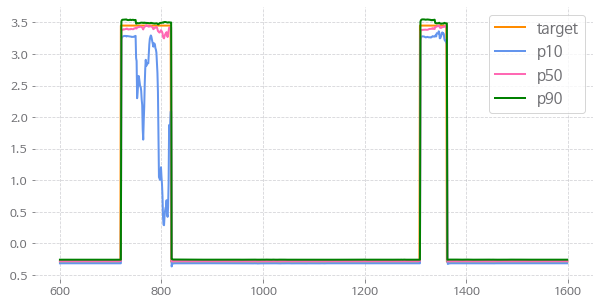

In [41]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(output_map['targets']['t+0'][600:1600], label='target', color='darkorange')
plt.plot(output_map['p10']['t+0'][600:1600], label='p10', color='cornflowerblue')
plt.plot(output_map['p50']['t+0'][600:1600], label='p50', color='hotpink')
plt.plot(output_map['p90']['t+0'][600:1600], label='p90', c='g')
plt.legend(loc='upper right', fontsize=15)
plt.show()